The Product Pricer Continued

A model that can estimate how much something costs, from its description.
Baseline Models

In [2]:
# imports

import os
import math
import json
import random
from dotenv import load_dotenv
from huggingface_hub import login
from helpers.items import Item
import matplotlib.pyplot as plt
import numpy as np
import pickle
from collections import Counter

In [3]:
# More imports for our traditional machine learning

import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [4]:
# And more imports for our NLP related machine learning

from sklearn.feature_extraction.text import CountVectorizer
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

In [5]:
# Finally, more imports for more advanced machine learning

from sklearn.svm import LinearSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor


In [6]:
# Constants - used for printing to stdout in color

GREEN = "\033[92m"
YELLOW = "\033[93m"
RED = "\033[91m"
RESET = "\033[0m"
COLOR_MAP = {"red":RED, "orange": YELLOW, "green": GREEN}

In [7]:
%matplotlib inline

 Loading the pkl files

In [8]:
with open('train.pkl', 'rb') as file:
    train = pickle.load(file)

with open('test.pkl', 'rb') as file:
    test = pickle.load(file)

In [9]:
# Remind ourselves the training prompt

print(train[0].prompt)

How much does this cost to the nearest dollar?

Minneer Racing Steering Simulator Cockpit Red with TV Bracket Mounting Holes Racing Wheel Stand/Fits Logitech G25, G27, G29/ Compatible with Xbox One, Playstation, PC Platforms with Capacity 220LBS
Price Guarantee#：If the price drops within 30 days of purchase, please contact us by email. We will arrange a refund of the price difference for you. Compatible with all racing wheels Thrustmaster, logitech, fanatec; fully customizable. Wide racing seat with thick padding, seat sliders and angle adjustment. Support the front and back adjustment of the seat and adjust the angle of the backrest. Compact, easy to foldable, easy to move, easy to store away. All mounting hardware and tools included. Ready to use right out the

Price is $345.00


In [17]:
# Remind a test prompt

print(test[0].test_prompt())

How much does this cost to the nearest dollar?

The Phantom of the Opera Gaston Leroux Clay Mini Book Key Chain Ring Bag Purse Backpack Clip Snap
“I tore off my mask so as not to lose one of her tears... and she did not run away!” Wouldn't you like a more effective way to keep track of your bag? This clay mini book pendant provides a durable, lightweight accessory to mark your satchel, purse or backpack. Both eye-catching and trendy, the stunning cover makes it easy to locate your belongings. VERSATILE it doubles as a lovely key chain or key ring.Treat yourself to a Book Beads adaptation of a novel which was first serialized in La Gaulois (1909) and remains a musical classic to this day. It's the perfect bookish accessory! HANDMADE IN THE USA when

Price is $


In [18]:
from helpers.testing import Tester

Let's start with a random number generator!

In [19]:
def random_pricer(item):
    return random.randrange(1,1000)

1: Guess: $655.00 Truth: $35.00 Error: $620.00 SLE: 8.43 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $115.00 Truth: $135.99 Error: $20.99 SLE: 0.03 Item: Norcold 628970 Fridge Part
3: Guess: $26.00 Truth: $178.43 Error: $152.43 SLE: 3.59 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $760.00 Truth: $6.98 Error: $753.02 SLE: 20.77 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $282.00 Truth: $45.99 Error: $236.01 SLE: 3.22 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $251.00 Truth: $88.99 Error: $162.01 SLE: 1.06 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $229.00 Truth: $104.95 Error: $124.05 SLE: 0.60 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $143.00 Truth: $215.00 Error: $72.00 SLE: 0.16 Item: Corpse Party: Back to School Edition - N...
9: Guess: $755.00 Truth: $75.00 Error: $680.00 SLE: 5.28 Item: True leather case for Microsoft Surface ...
10: Guess: $105.00 Truth: $97.71 Error: $7.29 SLE: 0.

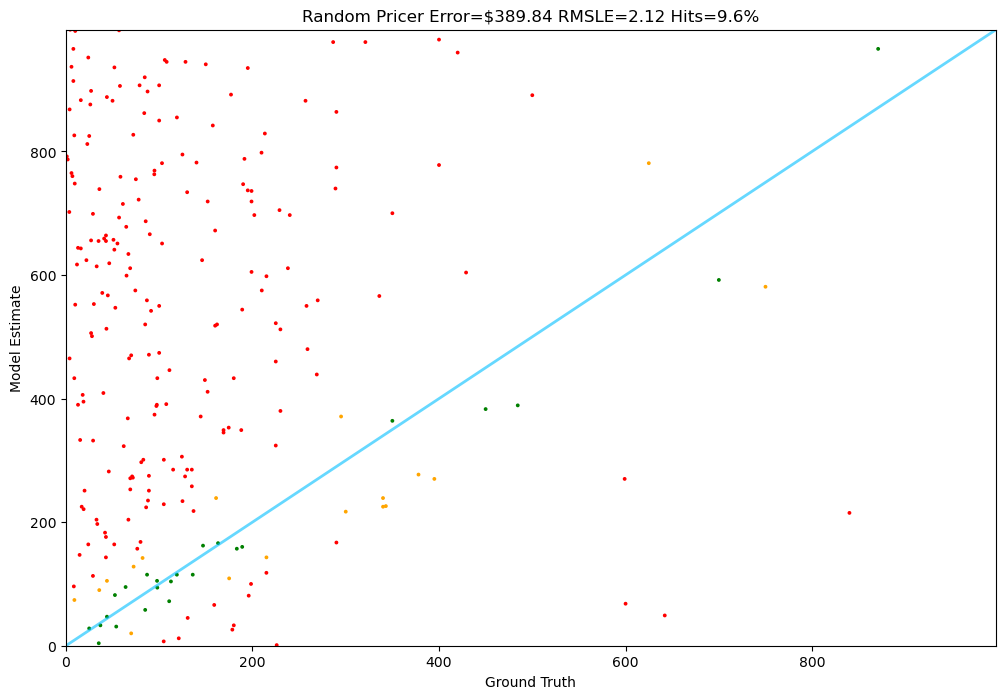

In [23]:
# Set the random seed

random.seed(42)

# Run our TestRunner
Tester.test(random_pricer,test)

Let's test with the average price 

In [24]:
# another rather trivial model

training_prices = [item.price for item in train]
training_average = sum(training_prices) / len(training_prices)

def constant_pricer(item):
    return training_average

1: Guess: $150.81 Truth: $35.00 Error: $115.81 SLE: 2.07 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $150.81 Truth: $135.99 Error: $14.82 SLE: 0.01 Item: Norcold 628970 Fridge Part
3: Guess: $150.81 Truth: $178.43 Error: $27.62 SLE: 0.03 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $150.81 Truth: $6.98 Error: $143.83 SLE: 8.68 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $150.81 Truth: $45.99 Error: $104.82 SLE: 1.38 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $150.81 Truth: $88.99 Error: $61.82 SLE: 0.27 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $150.81 Truth: $104.95 Error: $45.86 SLE: 0.13 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $150.81 Truth: $215.00 Error: $64.19 SLE: 0.12 Item: Corpse Party: Back to School Edition - N...
9: Guess: $150.81 Truth: $75.00 Error: $75.81 SLE: 0.48 Item: True leather case for Microsoft Surface ...
10: Guess: $150.81 Truth: $97.71 Error: $53.10 SLE: 0.19 

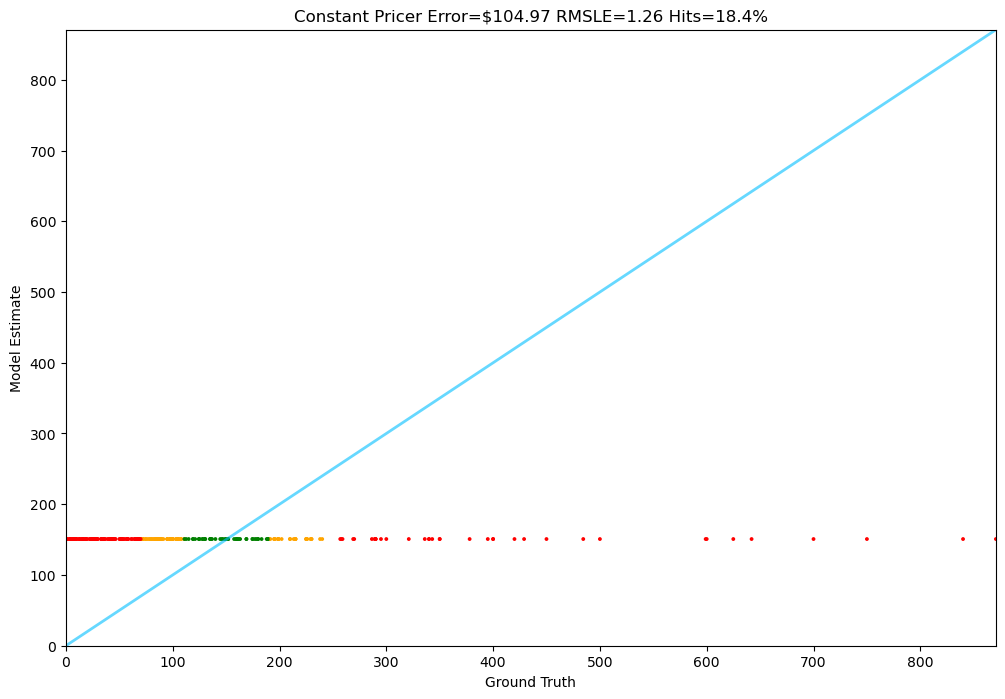

In [25]:
# Run our TestRunner
Tester.test(constant_pricer,test)

Feature Engineering

In [26]:
train[0].details

'{"Best Sellers Rank": {"Video Games": 123519, "PC Game Racing Wheels": 421}, "Pricing": "The strikethrough price is the List Price. Savings represents a discount off the List Price.", "Product Dimensions": "27 x 21 x 9 inches", "Manufacturer": "Minneer", "Date First Available": "August 12, 2021"}'

In [27]:
# Create a new "features" field on items, and populate it with json parsed from the details dict

for item in train:
    item.features = json.loads(item.details)
for item in test:
    item.features = json.loads(item.details)

In [30]:
# Look at one
train[0].features.keys()

dict_keys(['Best Sellers Rank', 'Pricing', 'Product Dimensions', 'Manufacturer', 'Date First Available'])

In [31]:
# Look at 20 most common features in training set

feature_count = Counter()
for item in train:
    for f in item.features.keys():
        feature_count[f]+=1

feature_count.most_common(40)

[('Date First Available', 14314),
 ('Manufacturer', 8141),
 ('Item Weight', 8132),
 ('Best Sellers Rank', 7757),
 ('Product Dimensions', 6882),
 ('Item model number', 6549),
 ('Is Discontinued By Manufacturer', 5582),
 ('Brand', 4341),
 ('Package Dimensions', 4073),
 ('Pricing', 3318),
 ('Part Number', 3266),
 ('Type of item', 3086),
 ('Batteries Required?', 2906),
 ('Color', 2859),
 ('Rated', 2236),
 ('Batteries Included?', 2230),
 ('Department', 2209),
 ('Country of Origin', 1870),
 ('Brand Name', 1830),
 ('Release date', 1775),
 ('Special Feature', 1593),
 ('Included Components', 1492),
 ('Material', 1402),
 ('Model Info', 1343),
 ('Item Package Quantity', 1220),
 ('Voltage', 1195),
 ('Special Features', 1058),
 ('Batteries', 925),
 ('Material Type', 919),
 ('Installation Type', 852),
 ('Capacity', 824),
 ('Finish Type', 694),
 ('Item Dimensions LxWxH', 678),
 ('Model Name', 665),
 ('Form Factor', 654),
 ('Connectivity Technology', 640),
 ('Compatible Devices', 628),
 ('Language', 6

In [32]:
#utility function to normalize the weight of an item
def get_weight(item):
    weight_str = item.features.get('Item Weight')
    if weight_str:
        parts = weight_str.split(' ')
        amount = float(parts[0])
        unit = parts[1].lower()
        if unit=="pounds":
            return amount
        elif unit=="ounces":
            return amount / 16
        elif unit=="grams":
            return amount / 453.592
        elif unit=="milligrams":
            return amount / 453592
        elif unit=="kilograms":
            return amount / 0.453592
        elif unit=="hundredths" and parts[2].lower()=="pounds":
            return amount / 100
        else:
            print(weight_str)
    return None

In [33]:
weights = [get_weight(t) for t in train]
weights = [w for w in weights if w]

In [34]:
average_weight = sum(weights)/len(weights)
average_weight

8.796918440713364

In [36]:
#replace missing weights with the avearge weight 
def get_weight_with_default(item):
    weight = get_weight(item)
    return weight or average_weight

In [37]:
def get_rank(item):
    rank_dict = item.features.get("Best Sellers Rank")
    if rank_dict:
        ranks = rank_dict.values()
        return sum(ranks)/len(ranks)
    return None

In [38]:
ranks = [get_rank(t) for t in train]
ranks = [r for r in ranks if r]
average_rank = sum(ranks)/len(ranks)
average_rank

120364.9699002409

In [40]:
#replace the rank with the average rank if it is missing 
def get_rank_with_default(item):
    rank = get_rank(item)
    return rank or average_rank

In [41]:
def get_text_length(item):
    return len(item.test_prompt())

In [42]:
# investigate the brands

brands = Counter()
for t in train:
    brand = t.features.get("Brand")
    if brand:
        brands[brand]+=1

# Look at most common 40 brands

brands.most_common(40)

[('Frigidaire', 141),
 ('GE', 104),
 ('Whirlpool', 96),
 ('Nostalgic Warehouse', 60),
 ('Razer', 58),
 ('Empava', 54),
 ('SAMSUNG', 45),
 ('Logitech G', 39),
 ('Broan-NuTone', 38),
 ('Nintendo', 37),
 ('LG', 36),
 ('Keychron', 36),
 ('Z Line Kitchen and Bath', 33),
 ('Logitech', 33),
 ('Supplying Demand', 32),
 ('SteelSeries', 31),
 ('Corsair', 29),
 ('SPT', 29),
 ('COSTWAY', 28),
 ('Avanti', 24),
 ('GASLAND', 23),
 ('ASUS', 20),
 ('Summit Appliance', 20),
 ('Generic', 20),
 ('EdgeStar', 18),
 ('Whynter', 17),
 ('Sony', 17),
 ('Microsoft', 17),
 ('RCA', 16),
 ('Avolusion', 16),
 ('Kobe', 15),
 ('VEVOR', 15),
 ('Hauslane', 13),
 ('WANAI', 13),
 ('COSMO', 13),
 ('BLACK+DECKER', 12),
 ('Electrolux', 12),
 ("COMFEE'", 12),
 ('Supco', 12),
 ('Broan', 12)]

In [43]:
def get_features(item):
    return {
        "weight": get_weight_with_default(item),
        "rank": get_rank_with_default(item),
        "text_length": get_text_length(item)
    }

In [44]:
# Look at features in a training item
get_features(train[0])

{'weight': 8.796918440713364, 'rank': 61970.0, 'text_length': 784}

In [45]:
# A utility function to convert our features into a pandas dataframe

def list_to_dataframe(items):
    features = [get_features(item) for item in items]
    df = pd.DataFrame(features)
    df['price'] = [item.price for item in items]
    return df

train_df = list_to_dataframe(train)
test_df = list_to_dataframe(test[:250])

Linear Regression

In [46]:
# Traditional Linear Regression!

np.random.seed(42)

# Separate features and target
feature_columns = ['weight', 'rank', 'text_length']

X_train = train_df[feature_columns]
y_train = train_df['price']
X_test = test_df[feature_columns]
y_test = test_df['price']

# Train a Linear Regression
model = LinearRegression()
model.fit(X_train, y_train)

for feature, coef in zip(feature_columns, model.coef_):
    print(f"{feature}: {coef}")
print(f"Intercept: {model.intercept_}")

# Predict the test set and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")

weight: 4.022272120466721
rank: -4.25179150129257e-05
text_length: 0.08657926258348807
Intercept: 51.97366702427986
Mean Squared Error: 15162.056515450973
R-squared Score: 0.28334980190448644


In [47]:
# Function to predict price for a new item

def linear_regression_pricer(item):
    features = get_features(item)
    features_df = pd.DataFrame([features])
    return model.predict(features_df)[0]

1: Guess: $148.82 Truth: $35.00 Error: $113.82 SLE: 2.03 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $109.78 Truth: $135.99 Error: $26.21 SLE: 0.05 Item: Norcold 628970 Fridge Part
3: Guess: $275.01 Truth: $178.43 Error: $96.58 SLE: 0.19 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $151.07 Truth: $6.98 Error: $144.09 SLE: 8.69 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $114.07 Truth: $45.99 Error: $68.08 SLE: 0.80 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $185.02 Truth: $88.99 Error: $96.03 SLE: 0.53 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $136.71 Truth: $104.95 Error: $31.76 SLE: 0.07 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $125.37 Truth: $215.00 Error: $89.63 SLE: 0.29 Item: Corpse Party: Back to School Edition - N...
9: Guess: $153.23 Truth: $75.00 Error: $78.23 SLE: 0.50 Item: True leather case for Microsoft Surface ...
10: Guess: $104.47 Truth: $97.71 Error: $6.76 SLE: 0.00 It

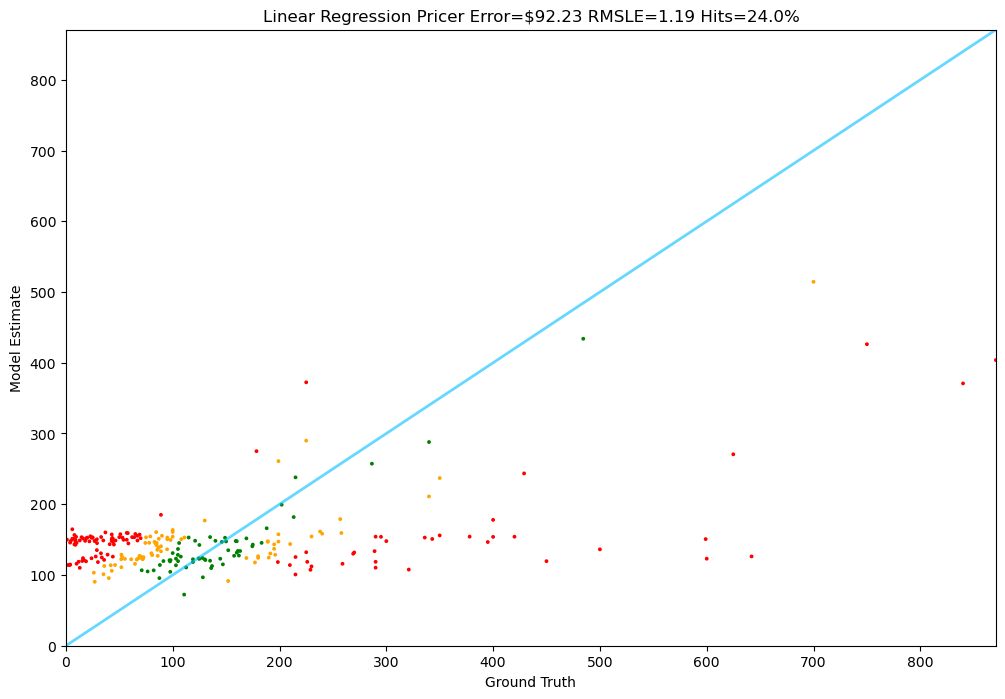

In [49]:
# test it

Tester.test(linear_regression_pricer,test)

In [50]:
# For the next few models, we prepare our documents and prices
# Note that we use the test prompt for the documents, otherwise we'll reveal the answer!!
prices = np.array([float(item.price) for item in train])
documents = [item.test_prompt() for item in train]

In [51]:
# Use the CountVectorizer for a Bag of Words model

np.random.seed(42)
vectorizer = CountVectorizer(max_features=1000, stop_words='english')
X = vectorizer.fit_transform(documents)
regressor = LinearRegression()
regressor.fit(X, prices)

LinearRegression()

In [52]:
def bow_lr_pricer(item):
    x = vectorizer.transform([item.test_prompt()])
    return max(regressor.predict(x)[0], 0)

1: Guess: $0.00 Truth: $35.00 Error: $35.00 SLE: 12.84 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $158.33 Truth: $135.99 Error: $22.34 SLE: 0.02 Item: Norcold 628970 Fridge Part
3: Guess: $127.86 Truth: $178.43 Error: $50.57 SLE: 0.11 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $124.82 Truth: $6.98 Error: $117.84 SLE: 7.61 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $218.85 Truth: $45.99 Error: $172.86 SLE: 2.38 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $135.47 Truth: $88.99 Error: $46.48 SLE: 0.17 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $90.47 Truth: $104.95 Error: $14.48 SLE: 0.02 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $81.33 Truth: $215.00 Error: $133.67 SLE: 0.93 Item: Corpse Party: Back to School Edition - N...
9: Guess: $164.42 Truth: $75.00 Error: $89.42 SLE: 0.60 Item: True leather case for Microsoft Surface ...
10: Guess: $172.55 Truth: $97.71 Error: $74.84 SLE: 0.32 Ite

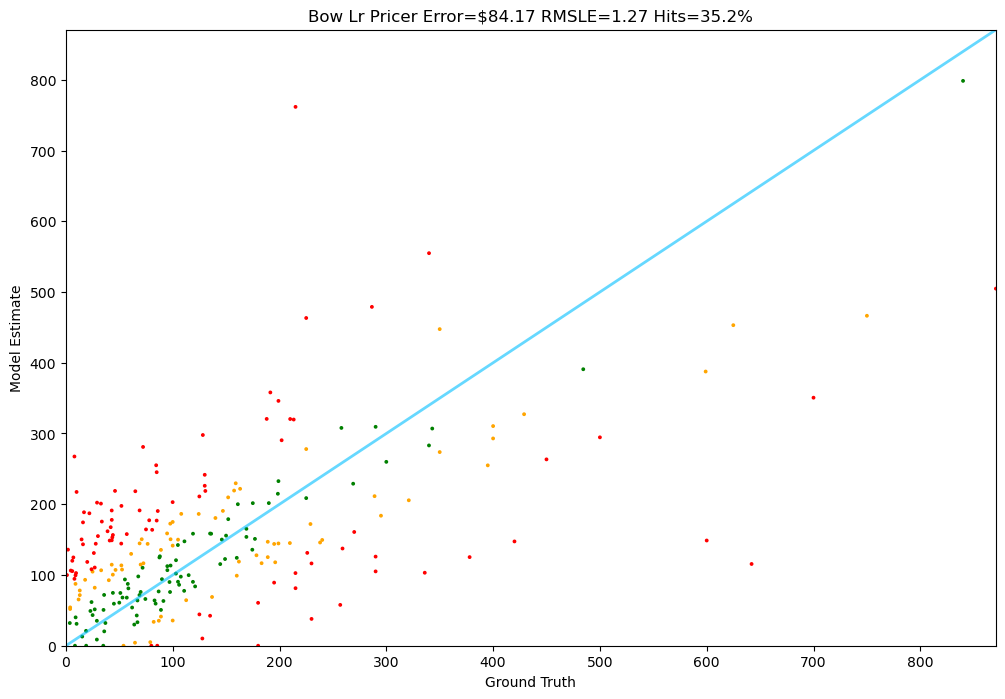

In [53]:
# test it

Tester.test(bow_lr_pricer,test)

In [54]:
# The amazing word2vec model, implemented in gensim NLP library

np.random.seed(42)

# Preprocess the documents
processed_docs = [simple_preprocess(doc) for doc in documents]

# Train Word2Vec model
w2v_model = Word2Vec(sentences=processed_docs, vector_size=400, window=5, min_count=1, workers=4)

In [55]:
def document_vector(doc):
    doc_words = simple_preprocess(doc)
    word_vectors = [w2v_model.wv[word] for word in doc_words if word in w2v_model.wv]
    return np.mean(word_vectors, axis=0) if word_vectors else np.zeros(w2v_model.vector_size)

# Create feature matrix
X_w2v = np.array([document_vector(doc) for doc in documents])

In [56]:
# Run Linear Regression on word2vec

word2vec_lr_regressor = LinearRegression()
word2vec_lr_regressor.fit(X_w2v, prices)

LinearRegression()

In [57]:
def word2vec_lr_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, word2vec_lr_regressor.predict([doc_vector])[0])

1: Guess: $52.29 Truth: $35.00 Error: $17.29 SLE: 0.15 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $81.96 Truth: $135.99 Error: $54.03 SLE: 0.25 Item: Norcold 628970 Fridge Part
3: Guess: $295.42 Truth: $178.43 Error: $116.99 SLE: 0.25 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $106.24 Truth: $6.98 Error: $99.26 SLE: 6.75 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $181.90 Truth: $45.99 Error: $135.91 SLE: 1.85 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $188.24 Truth: $88.99 Error: $99.25 SLE: 0.55 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $97.52 Truth: $104.95 Error: $7.43 SLE: 0.01 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $122.25 Truth: $215.00 Error: $92.75 SLE: 0.31 Item: Corpse Party: Back to School Edition - N...
9: Guess: $112.06 Truth: $75.00 Error: $37.06 SLE: 0.16 Item: True leather case for Microsoft Surface ...
10: Guess: $182.26 Truth: $97.71 Error: $84.55 SLE: 0.38 Item:

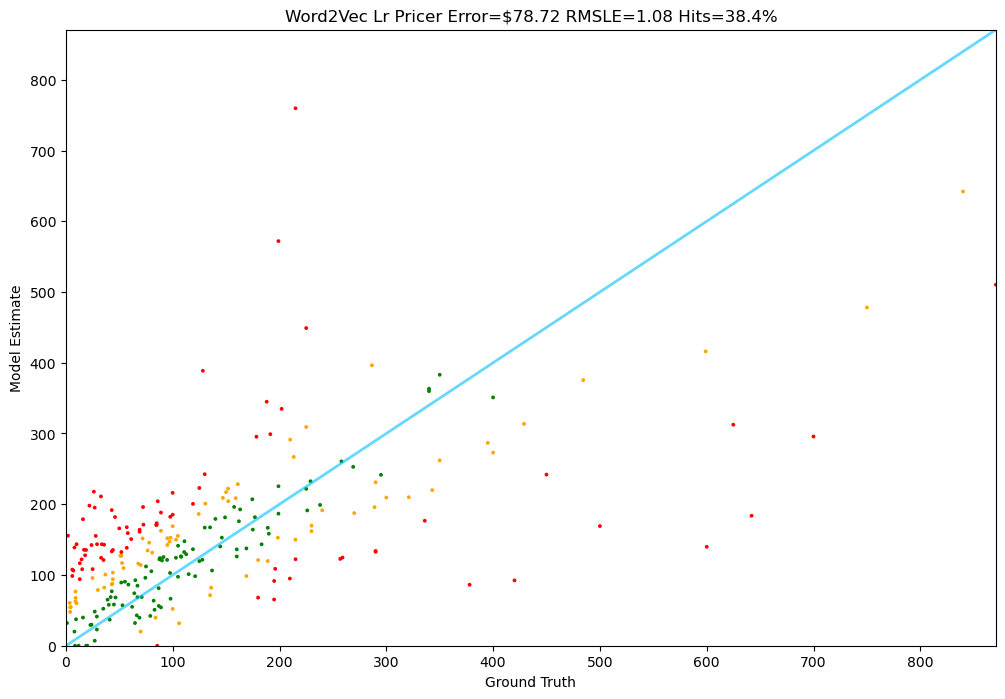

In [58]:
Tester.test(word2vec_lr_pricer,test)

In [59]:
# Support Vector Machines

np.random.seed(42)
svr_regressor = LinearSVR()

svr_regressor.fit(X_w2v, prices)

LinearSVR()

In [60]:
def svr_pricer(item):
    np.random.seed(42)
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(float(svr_regressor.predict([doc_vector])[0]),0)

1: Guess: $60.93 Truth: $35.00 Error: $25.93 SLE: 0.29 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $99.82 Truth: $135.99 Error: $36.17 SLE: 0.09 Item: Norcold 628970 Fridge Part
3: Guess: $204.20 Truth: $178.43 Error: $25.77 SLE: 0.02 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $78.48 Truth: $6.98 Error: $71.50 SLE: 5.28 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $102.63 Truth: $45.99 Error: $56.64 SLE: 0.63 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $181.05 Truth: $88.99 Error: $92.06 SLE: 0.50 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $59.20 Truth: $104.95 Error: $45.75 SLE: 0.32 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $68.92 Truth: $215.00 Error: $146.08 SLE: 1.27 Item: Corpse Party: Back to School Edition - N...
9: Guess: $17.74 Truth: $75.00 Error: $57.26 SLE: 1.96 Item: True leather case for Microsoft Surface ...
10: Guess: $114.96 Truth: $97.71 Error: $17.25 SLE: 0.03 Item: Vi

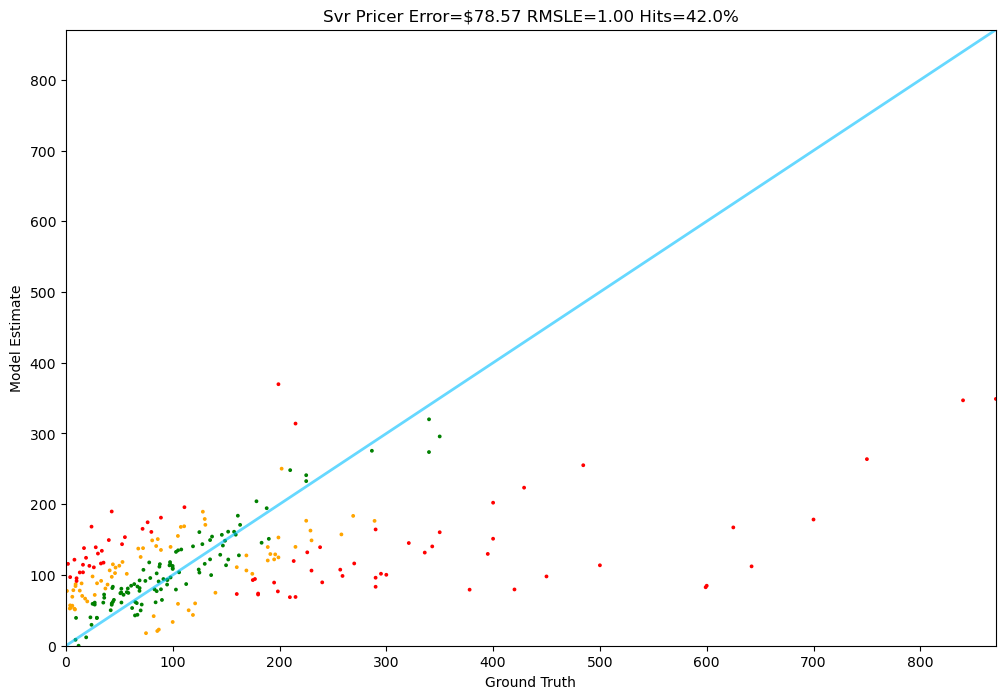

In [61]:
Tester.test(svr_pricer,test)

In [62]:
# And the powerful Random Forest regression

rf_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=8)
rf_model.fit(X_w2v, prices)

RandomForestRegressor(n_jobs=8, random_state=42)

In [63]:
def random_forest_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, rf_model.predict([doc_vector])[0])

1: Guess: $83.67 Truth: $35.00 Error: $48.67 SLE: 0.73 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $178.59 Truth: $135.99 Error: $42.60 SLE: 0.07 Item: Norcold 628970 Fridge Part
3: Guess: $311.82 Truth: $178.43 Error: $133.39 SLE: 0.31 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $60.20 Truth: $6.98 Error: $53.22 SLE: 4.15 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $122.94 Truth: $45.99 Error: $76.95 SLE: 0.94 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $265.87 Truth: $88.99 Error: $176.88 SLE: 1.18 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $104.82 Truth: $104.95 Error: $0.13 SLE: 0.00 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $107.80 Truth: $215.00 Error: $107.20 SLE: 0.47 Item: Corpse Party: Back to School Edition - N...
9: Guess: $80.06 Truth: $75.00 Error: $5.06 SLE: 0.00 Item: True leather case for Microsoft Surface ...
10: Guess: $250.30 Truth: $97.71 Error: $152.59 SLE: 0.87 Item

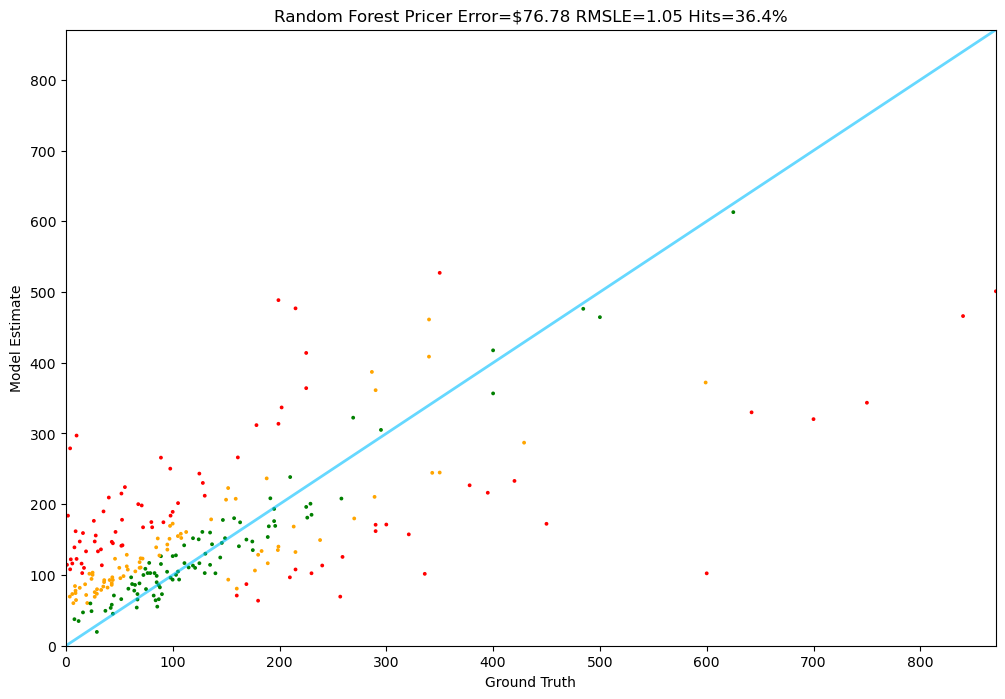

In [64]:
Tester.test(random_forest_pricer,test)

In [65]:
# And the powerful Gradient Boosting regression

gb_model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3)
gb_model.fit(X_w2v, prices)

GradientBoostingRegressor()

In [66]:
def gradient_boosting_pricer(item):
    doc = item.test_prompt()
    doc_vector = document_vector(doc)
    return max(0, gb_model.predict([doc_vector])[0])

1: Guess: $85.13 Truth: $35.00 Error: $50.13 SLE: 0.76 Item: The Phantom of the Opera Gaston Leroux C...
2: Guess: $137.68 Truth: $135.99 Error: $1.69 SLE: 0.00 Item: Norcold 628970 Fridge Part
3: Guess: $366.79 Truth: $178.43 Error: $188.36 SLE: 0.52 Item: SPT RF-244SS Compact Refrigerator, Stain...
4: Guess: $101.33 Truth: $6.98 Error: $94.35 SLE: 6.51 Item: Letter Red B Balloons,40 Inch Single Red...
5: Guess: $124.54 Truth: $45.99 Error: $78.55 SLE: 0.97 Item: Konami Classics Arcade Hits - Nintendo D...
6: Guess: $186.17 Truth: $88.99 Error: $97.18 SLE: 0.54 Item: Mini Washing Machine, Portable Washer fo...
7: Guess: $71.91 Truth: $104.95 Error: $33.04 SLE: 0.14 Item: Farmhouse Buffalo Plaid Wreath - Front D...
8: Guess: $120.25 Truth: $215.00 Error: $94.75 SLE: 0.33 Item: Corpse Party: Back to School Edition - N...
9: Guess: $72.01 Truth: $75.00 Error: $2.99 SLE: 0.00 Item: True leather case for Microsoft Surface ...
10: Guess: $163.17 Truth: $97.71 Error: $65.46 SLE: 0.26 Item: V

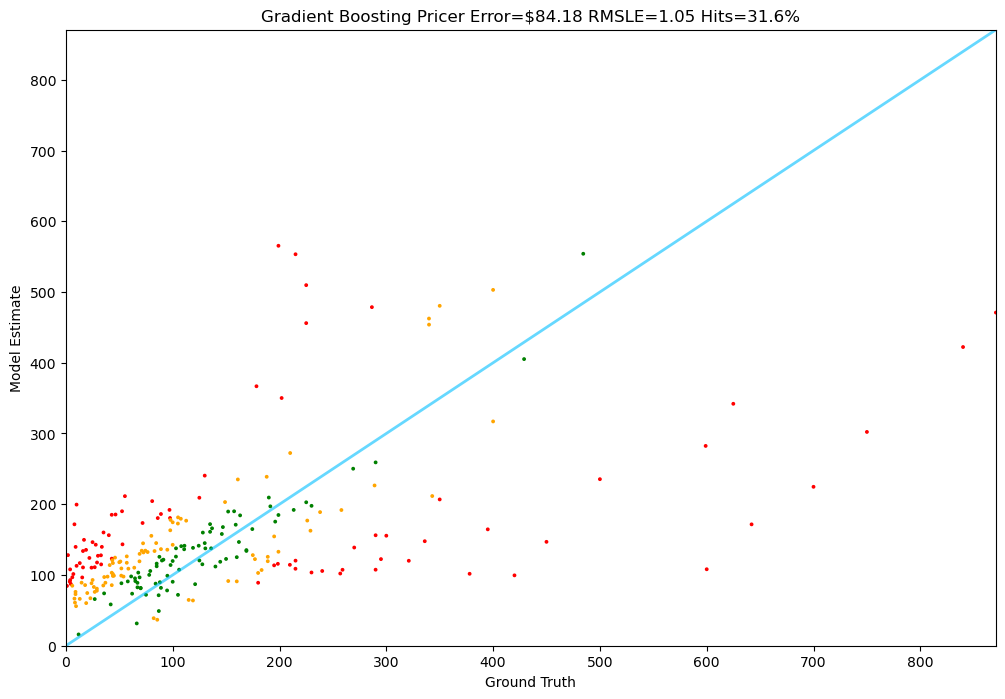

In [67]:
Tester.test(gradient_boosting_pricer,test)